# Scores

### Introduction:

This time you will create the data.

***Exercise based on [Chris Albon](http://chrisalbon.com/) work, the credits belong to him.***

### Step 1. Import the necessary libraries

In [4]:
import numpy as np
import matplotlib
import pandas as pd
pd.set_option('display.max_rows',10)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2. Create the DataFrame that should look like the one below.

In [5]:
raw = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
      'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
      'age': [42,52,36,24,73],
      'female': [0,1,1,0,1],
      'preTestScore': [4,24,31,2,3],
      'postTestScore': [25,94,57,62,70]}

In [6]:
df = pd.DataFrame(raw).reset_index()
df.head(5)

,index,first_name,last_name,age,female,preTestScore,postTestScore
0,0,Jason,Miller,42,0,4,25
1,1,Molly,Jacobson,52,1,24,94
2,2,Tina,Ali,36,1,31,57
3,3,Jake,Milner,24,0,2,62
4,4,Amy,Cooze,73,1,3,70


In [7]:
_ = df.melt(id_vars=['index', 'first_name', 'last_name', 'age', 'female'],
            value_vars=['preTestScore', 'postTestScore'],
           var_name='pre_post')
_['female'] = _['female'].map({0:'male', 1: 'female'})
_.rename(columns={'female': 'gender'}, inplace=True)
_

,index,first_name,last_name,age,gender,pre_post,value
0,0,Jason,Miller,42,male,preTestScore,4
1,1,Molly,Jacobson,52,female,preTestScore,24
2,2,Tina,Ali,36,female,preTestScore,31
3,3,Jake,Milner,24,male,preTestScore,2
4,4,Amy,Cooze,73,female,preTestScore,3
5,0,Jason,Miller,42,male,postTestScore,25
6,1,Molly,Jacobson,52,female,postTestScore,94
7,2,Tina,Ali,36,female,postTestScore,57
8,3,Jake,Milner,24,male,postTestScore,62
9,4,Amy,Cooze,73,female,postTestScore,70


### Step 3. Create a Scatterplot of preTestScore and postTestScore, with the size of each point determined by age
#### Hint: Don't forget to place the labels

In [8]:
def subtitle_legend(ax, legend_format, bbta_tuple):
    new_handles = []
    handles, labels = ax.get_legend_handles_labels()
    label_dict = dict(zip(labels, handles)) 
    if len(label_dict) != len(labels): # Means 2 labels were the same
        raise ValueError("Can not have repeated levels in labels!")
    for subtitle, level_order in legend_format.items():
        #Roll a blank handle to add in the subtitle
        blank_handle = matplotlib.patches.Patch(visible=False, label=subtitle)
        new_handles.append(blank_handle)
        for level in level_order:
            handle = label_dict[level]
            new_handles.append(handle)
    #Labels are populated from handle.get_label() when we only supply handles as an arg
    legend = ax.legend(handles=new_handles, bbox_to_anchor=bbta_tuple)
    #Turn off DrawingArea visibility to left justify the text if it contains a subtitle
    for draw_area in legend.findobj(matplotlib.offsetbox.DrawingArea):
        for handle in draw_area.get_children():
            if handle.get_label() in legend_format:
                draw_area.set_visible(False)
    return legend

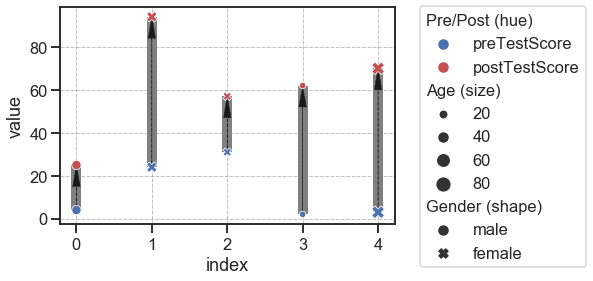

In [9]:
legend_format = {'Pre/Post (hue)': ['preTestScore', 'postTestScore'],
                'Age (size)': ['20', '40', '60', '80'],
                'Gender (shape)': ['male', 'female']}

sns.set(context='talk', style='ticks')

fig, ax = plt.subplots(1)
sns.scatterplot(data=_, x='index', y='value',style='gender',
                hue='pre_post', size='age', ax=ax, palette=['b', 'r'], zorder=5)
ax.vlines(x=df['index'],ymin=df['preTestScore'], ymax=df['postTestScore'], lw=10, color='grey', zorder=1)
for x,y1,y2 in zip(df['index'],df['preTestScore'], df['postTestScore']):
    ax.arrow(x, y1, 0, y2-y1, head_width=0.1, head_length=10,
             fc='k', ec='k', lw=0.5, ls='-.',
             length_includes_head=True, zorder=3)
fig.set_facecolor('w')
plt.grid(axis='both', color='grey', linestyle='-.', lw=0.5)
# sns.despine()
subtitle_legend(ax, legend_format=legend_format, bbta_tuple=(1.05,1.04))

plt.show()

### Step 4. Create a Scatterplot of preTestScore and postTestScore.
### This time the size should be 4.5 times the postTestScore and the color determined by sex

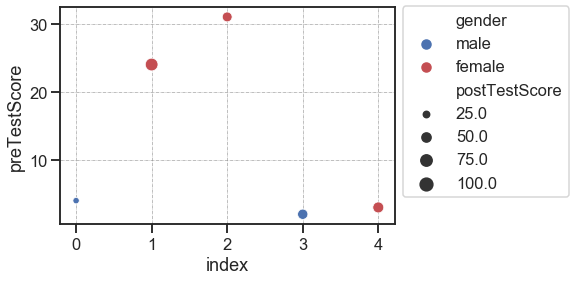

In [11]:
sns.set(context='talk', style='ticks')

fig, ax = plt.subplots(1)
sns.scatterplot(data=_, x=df['index'], y=df['preTestScore'],
                hue='gender', size=df['postTestScore'],  ax=ax, palette=['b', 'r'], zorder=5)
fig.set_facecolor('w')
ax.legend(bbox_to_anchor=(1,1.04))
plt.grid(axis='both', color='grey', linestyle='-.', lw=0.5)
plt.show()

### BONUS: Create your own question and answer it.

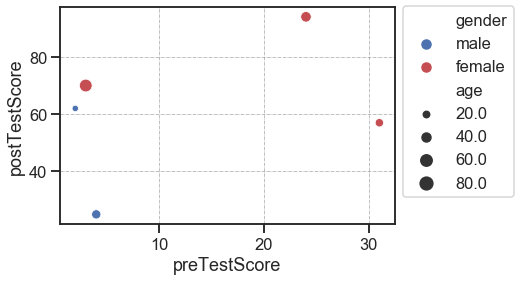

In [281]:
# posttestscore as a fonction of pretestscore with age as size and color of the points as gender
sns.set(context='talk', style='ticks')

fig, ax = plt.subplots(1)
sns.scatterplot(data=_, x=df['preTestScore'], y=df['postTestScore'],
                hue='gender', size=df['age'],  ax=ax, palette=['b', 'r'], zorder=5)
fig.set_facecolor('w')
ax.legend(bbox_to_anchor=(1,1.04))
plt.grid(axis='both', color='grey', linestyle='-.', lw=0.5)
plt.show()